# Analysis of recruiting data vs success outcomes

In [2]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsWinLossFrame = pd.read_csv("Data/fbsWinLossData.csv")
fbsWinLossFrame = fbsWinLossFrame[['season','team','games','wins','losses','ties','color']]

In [3]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsWinLossFrame, on= ['season','team','color'], how='outer')
comboFrame = comboFrame[comboFrame['conference'].isin(['ACC','Pac-10','Pac-12','Big Ten','SEC','Big 12'])]
comboFrame = comboFrame.replace('Pac-10','Pac-12')
comboFrame.conference.unique()

array(['SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten'], dtype=object)

In [4]:
# create some percentage metrics to normalize data
comboFrame['winPct'] = comboFrame['wins']/comboFrame['games']*100

In [12]:
# bin the years
bins1 = [2004,2007,2011,2015,2019]

bins2 = [2005,2008,2012,2016]

bins3 = [2006,2009,2013,2017

bins4 = [2007,20010,2014,2018]]

In [4]:
# get average recruiting rank and win percentage of each team
groupedTeam = comboFrame.groupby(['team','conference','color'])

groupedStats = pd.DataFrame({'avgPoints':groupedTeam['recruitingPoints'].sum()/groupedTeam['recruitingPoints'].count(),
                             'avgWinPct':groupedTeam['winPct'].sum()/groupedTeam['winPct'].count(),
                             'numSeasons':groupedTeam['winPct'].count()
                            })
groupedStats = groupedStats.reset_index()
groupedStats

,team,conference,color,avgPoints,avgWinPct,numSeasons
0,Alabama,SEC,#690014,283.966250,83.682984,16
1,Arizona,Pac-12,#002449,186.649375,47.800117,16
2,Arizona State,Pac-12,#942139,202.505000,57.553904,16
3,Arkansas,SEC,#9c1831,212.593750,48.983829,16
4,Auburn,SEC,#03244d,252.880000,68.815559,16
...,...,...,...,...,...,...
64,Wake Forest,ACC,#9E7E38,151.818750,46.813083,16
65,Washington,Pac-12,#2B2F64,208.059375,49.821533,16
66,Washington State,Pac-12,#94022a,172.148125,43.054341,16
67,West Virginia,Big 12,#FFC600,196.235000,58.049242,8


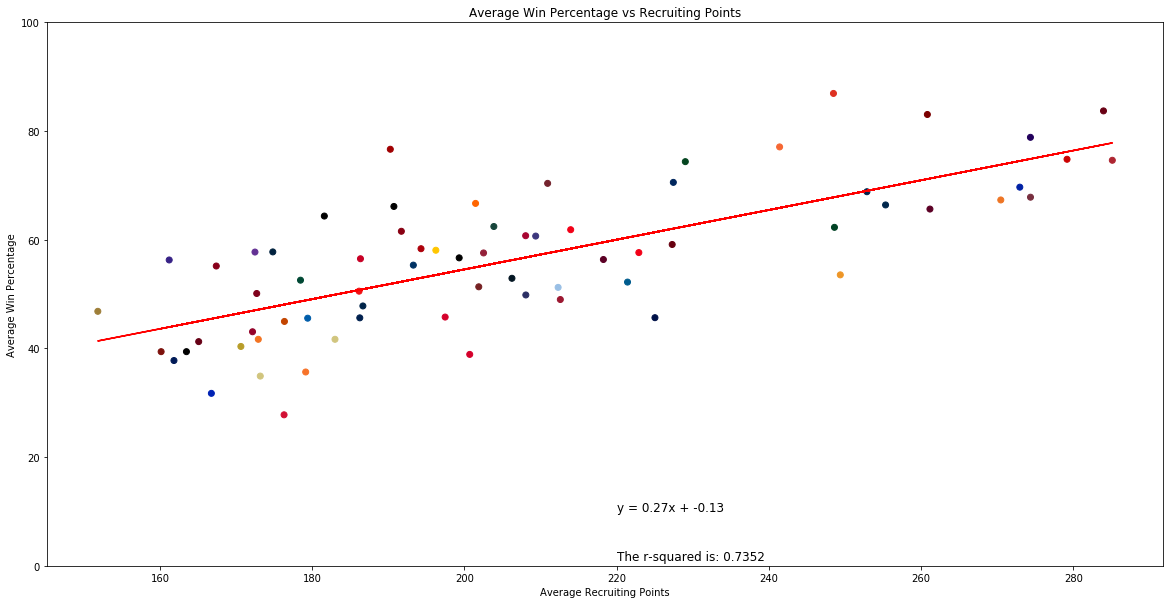

In [5]:
# create scatter/line plot of average win percentage vs average recruiting points
xvalues = groupedStats['avgPoints']
yvalues = groupedStats['avgWinPct']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,10),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,1),fontsize=12,color="black")
plt.title('Average Win Percentage vs Recruiting Points')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average Win Percentage')
plt.ylim(0,100)
# save figure
plt.savefig("Figures/AverageWinPctVsRecruitingPts.png")